# MULTIVARIATE ANALYSIS

#### Importing Important Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Importing the Dataset

In [3]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#### Checking Null or Missing Values

In [4]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#### Checking Duplicate Values and Removing Duplicates from the Dataset

In [5]:
print(f"Total number of duplicates: {df.duplicated().sum()}")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

Total number of duplicates: 562


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


## Doing Multivariate Analysis

1. Age -> Integer -> Age of the pregnant mother
2. Systolic BP -> Integer -> The top number (The pressure in thearteries when the heart is beating and sending blood into the arteries)
3. Diastolic BP -> Integer -> The bottom number (The pressure in the arteries when the heart rests between beats)
4. Blood Sugar -> Float -> Sugar level of body
5. Body Temp -> Float -> Temperature of the body in Fahrenheit
6. Heart Rate -> Integer -> Number of beats in a minute / Speed at which a heart beats
7. Risk Level -> Object -> The level of risk that a pregnant mother is entitled to

### Defining Risk Order and Colours

In [6]:
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]

### 1. Age, SystolicBP ---> Risk Level

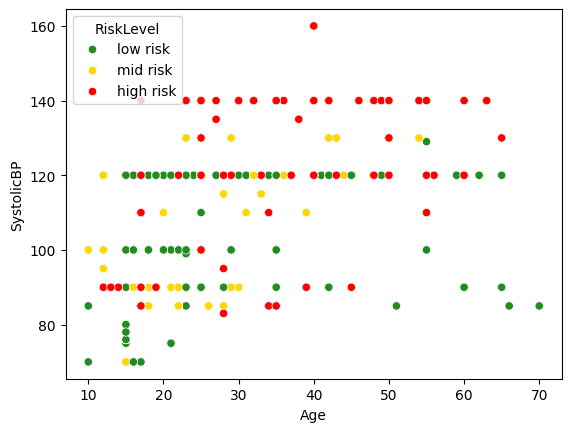

In [ ]:
sns.scatterplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
1. Pregnant women with high SystolicBP seems to have a high health risk, regardless of their age.
2. Having low SystolicBP at a young age (under 50 years) doesn't guarantee does not guarantee our health risk is low, but it seems to have it in old age makes our health risks lower.

### 2. Age, DiastolicBP ---> Risk Level

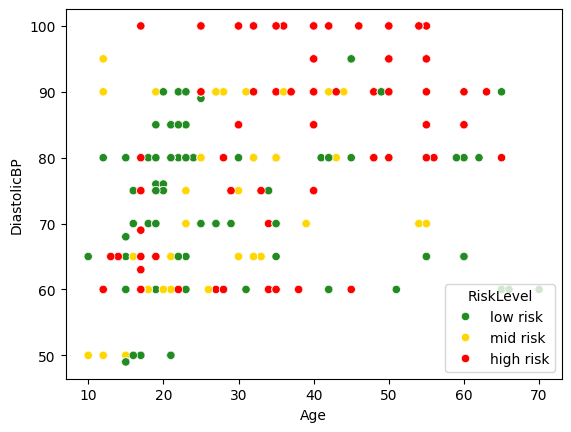

In [ ]:
sns.scatterplot(data=df, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
  1. This is same Systolic BP observation. We can see a similar scatter plot.
  2. This is because the Systolic BP and the Diastolic BP is positively correlated.

### 3. Age, BS ---> Risk Level

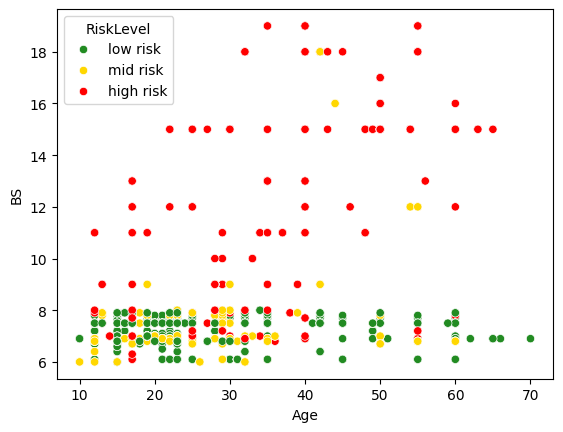

In [ ]:
sns.scatterplot(data=df, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
   1. The mothers who have low blood sugar regardless of their age has low risk with pregnancy.
   2. The mothers who have high blood sugar regardless of their age has high risk.
   3. This indicates that the age factor doesn't matter when we consider blood sugar.

### 4. Age, Body Temp ---> Risk Level

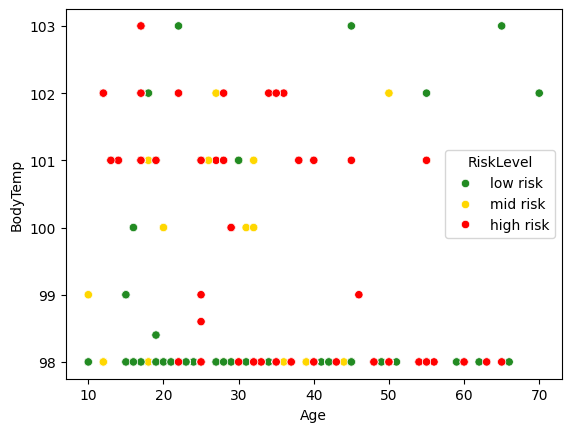

In [7]:
sns.scatterplot(data=df, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
1. Younger women with low normal body temperature seems to have low health risk, while younger women with high body temperature seems to have a high health risk.
2. Body temperature factor doesn't make any impact on older women.



### 5. Age, Heart Rate ---> Risk

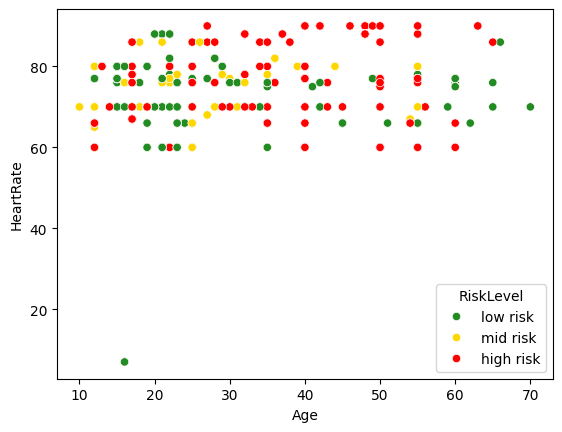

In [8]:
sns.scatterplot(data=df, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
  1. Even though we can see that regardless of the age, if the heart rate is normal, then the mothers have low health risk.
  2. However, as an overall view, we are able to see that heart rate has no impact on risk level because the points are scattered without a pattern.

### 6. Systolic BP, Diatolic BP ---> Risk Level

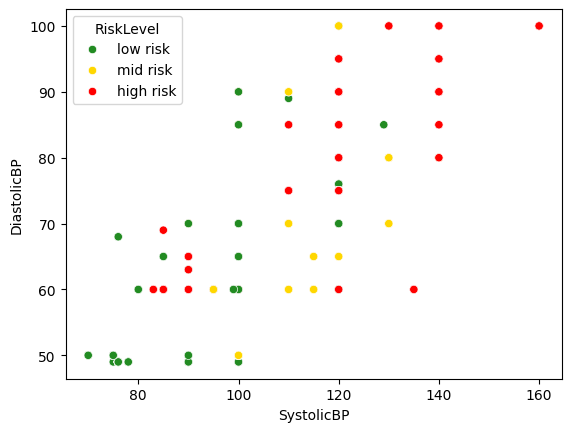

In [9]:
sns.scatterplot(data=df, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Mothers who have normal Systolic and Diastolic BP have low health risk.
  2. Mothers who have high Systolic and Diastolic BP have high health risk

### 7. Systolic BP, BS ---> Risk Level

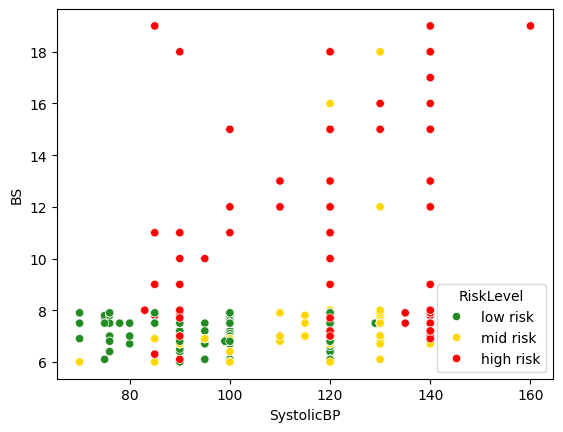

In [13]:
sns.scatterplot(data=df, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. It is evident that mothers who have low Blood Sugar with normal Systolic BP have low health risk.
  2. Mothers who have high blood sugar with high Systolic BP have high health risk.
  3. We can see a pattern in this graph, which implies that the Systolic BP and the Blood Sugar have high impact on the maternal health risk.

### 8. Systolic BP, Body Temp ---> Risk Level

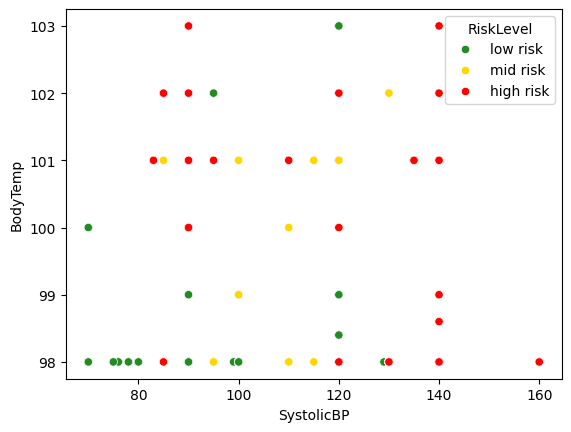

In [10]:
sns.scatterplot(data=df, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. We can see same observation as in Systolic and Diastolic BP, where the mothers who have low body temperature and low Systolic BP have low risk and mothers who have high Systolic BP with high body temperature have high health risk.

### 9. Systolic BP, Heart rate ---> Risk Level

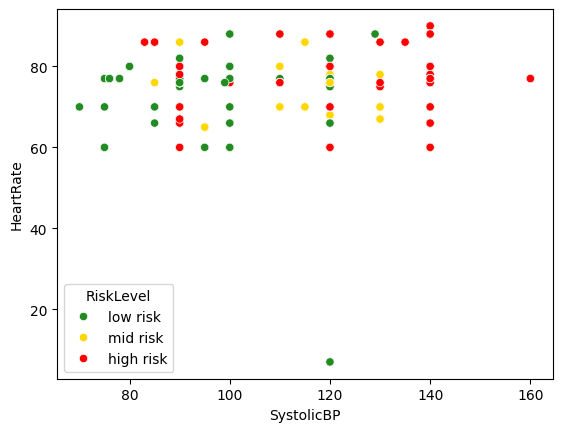

In [11]:
sns.scatterplot(data=df, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. On a basic level we can say, mothers who have normal heart rate with normal Systolic BP have low health risk.
  2. However, the we are not able to clearly find a pattern in heart rate to find the risk level.
  3. It is evident that heart rate has less impact on maternal health risk.

### 10. Diastolic BP, BS ---> Risk Level

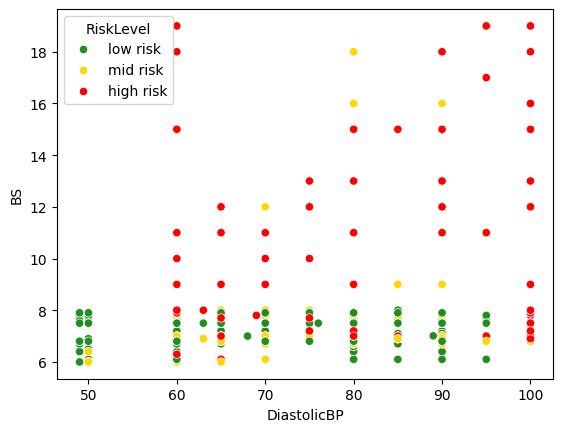

In [14]:
sns.scatterplot(data=df, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of the Diastolic BP, if the mothers have normal Blood Sugar level, the health risk is low.
  2. However, when the Diastolic BP exceeds 100, we can see that the mothers are in high risk regardless of the Blood Sugar.
  3. It is evident that the mothers who have high blood sugar and high Diastolic BP have high health risk
  4. We can come to a conclusion here that the mothers who have high blood sugar have high health risk regardless of the Diastolic BP until the BP exceeds 100, because after that the impacting factor is Diastolic BP, and not the Blood Sugar.

### 11. Diastolic BP, Body Temp ---> Risk Level

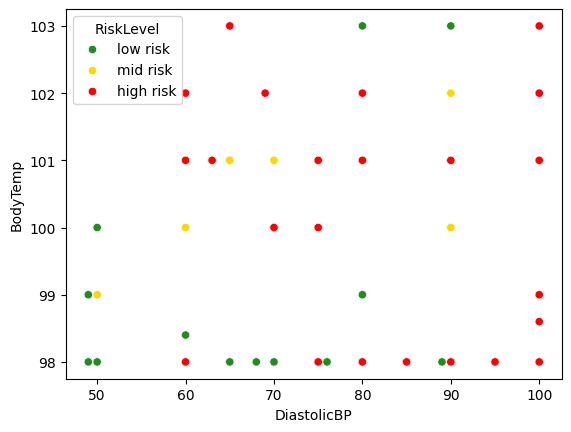

In [15]:
sns.scatterplot(data=df, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Mothers who have low Diastolic BP and low Body temperature have low health risk.
  2. Mothers who have high Diastolic Bp and high Body temperature have high health risk.
  3. regardless of the Body temperature, Diastolic BP impacts the health risk when Diastolic BP exceeds 100.

### 12. Diastolic BP, Heart Rate ---> Risk Level

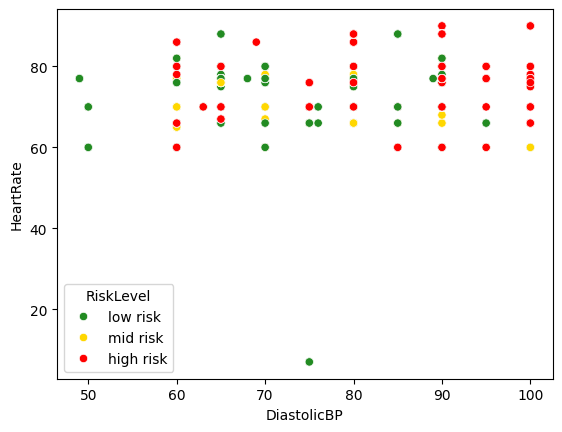

In [16]:
sns.scatterplot(data=df, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of the heart rate, the mothers who have low Diastolic BP have low health risk and the mothers who have high Diastolic BP have high health risk.
  2. Again, it is evident that the heart rate does not impact the health risk of pregnant mothers.

### 13. BS, Body Temp ---> Risk Level

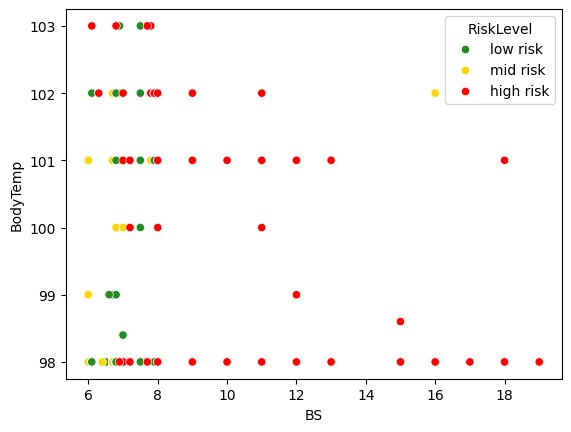

In [17]:
sns.scatterplot(data=df, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. regardless of body temperature, mothers who have high Blood Sugar have high health risk.
  2. However, if the body temperature exceeds 100, we can see that the impacting factor is body temperature and not Blood Sugar.

### 14. BS, Heart Rate ---> Risk Level

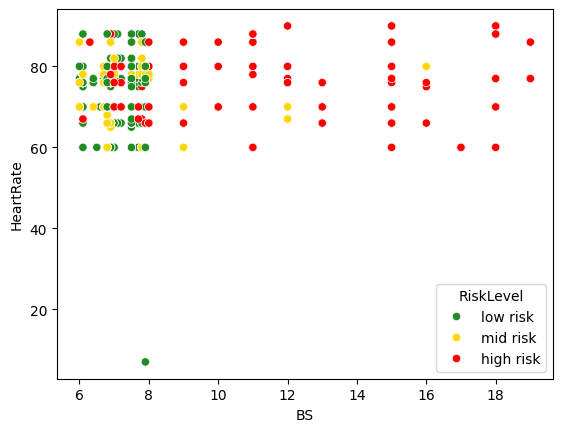

In [18]:
sns.scatterplot(data=df, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of heart rate, the mothers who have low Blood sugar level have low health risk.
  2. Mothers who have high blood sugar have high health risk.

### 15. Body Temp, Heart Rate ---> Risk Level

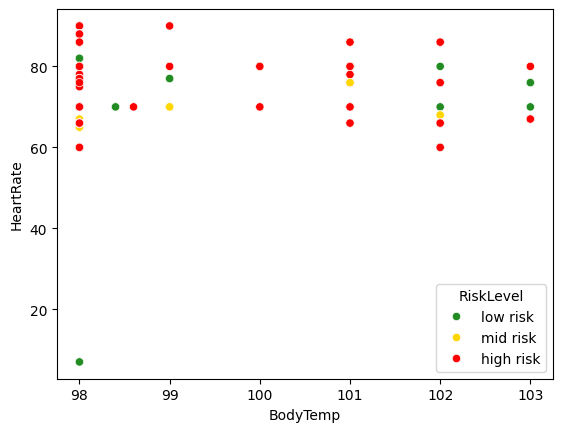

In [19]:
sns.scatterplot(data=df, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of the heart rate, pregnant mothers who have high body temperature have high health risk.
  2. However, even in normal body temperature and normal heart rate the data shows high health risk.

## Overall Observations

1. Heart rate is not an impactful factor in a pregnant mother's health risk.
2. Blood Sugar and Systolic BP have high impact in a pregnant mother's health risk.
3. Age and body temperature have a normal (medium range impact) on a pregnant mother's health. It depends upon the situation too.
4. Diastolic BP is correlated with Systolic BP therefore, it has an impact which is higher than the body temperature factor but lower that the Systolic BP factor.
5. Conclusion: Except heart rate, other factors have at least a small level of impact on the health risk. Therefore, it is better if we can remove the heart rate while building a model to decrease overfitting.

## Lasso Regularization Model

Total number of duplicates: 562
Number of rows in the cleaned dataset: 866
Linear Regression Coefficients:
Age            0.006546
SystolicBP     0.218350
DiastolicBP    0.031356
BS             0.343462
BodyTemp       0.216369
HeartRate      0.084847
dtype: float64


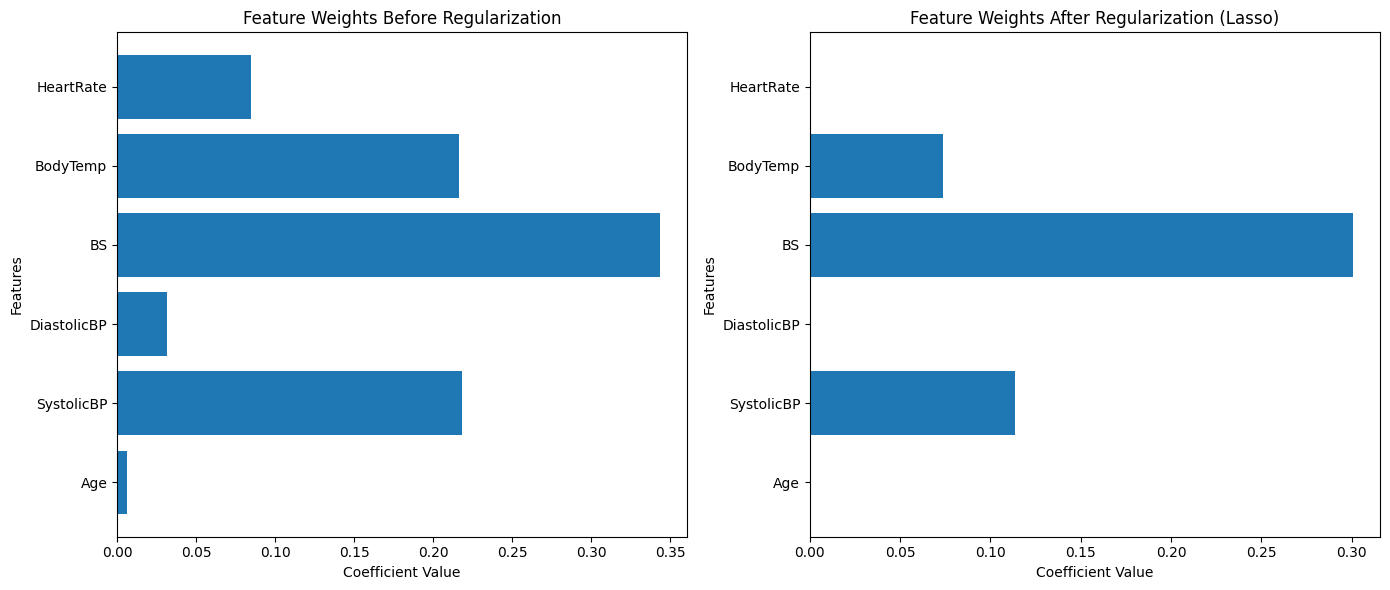

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

#Dropping the duplicates
print(f"Total number of duplicates: {df.duplicated().sum()}")
df_cleaned = df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

# Print the number of rows in the cleaned dataset
print(f"Number of rows in the cleaned dataset: {df_cleaned.shape[0]}")

# Mapping RiskLevel to numeric values
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_cleaned['RiskLevel'] = df_cleaned['RiskLevel'].map(risk_mapping)

# Handling any potential typos in the RiskLevel column
df_cleaned = df_cleaned.dropna(subset=['RiskLevel'])

# Features and target variable
X = df_cleaned.drop(columns='RiskLevel')
y = df_cleaned['RiskLevel']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Linear Regression model (before regularization)
linear_model = LinearRegression()
linear_model.fit(X_scaled, y)
linear_coefficients = pd.Series(linear_model.coef_, index=X.columns)

# Apply Lasso Regression (after regularization)
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso.fit(X_scaled, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Plotting the coefficients before and after regularization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before regularization
ax[0].barh(X.columns, linear_coefficients)
ax[0].set_title('Feature Weights Before Regularization')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Features')

# After regularization
ax[1].barh(X.columns, lasso_coefficients)
ax[1].set_title('Feature Weights After Regularization (Lasso)')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Features')

# Print the coefficients to inspect the differences
print("Linear Regression Coefficients:")
print(linear_coefficients)

plt.tight_layout()
plt.show()

When changing the weight of the Lasso Regression model, the regularisation changes.

## Ridge Regularization Model

Total number of duplicates: 562
Number of rows in the cleaned dataset: 866

Ridge Regression Coefficients:
Age            0.006771
SystolicBP     0.217714
DiastolicBP    0.031864
BS             0.342957
BodyTemp       0.216064
HeartRate      0.084839
dtype: float64


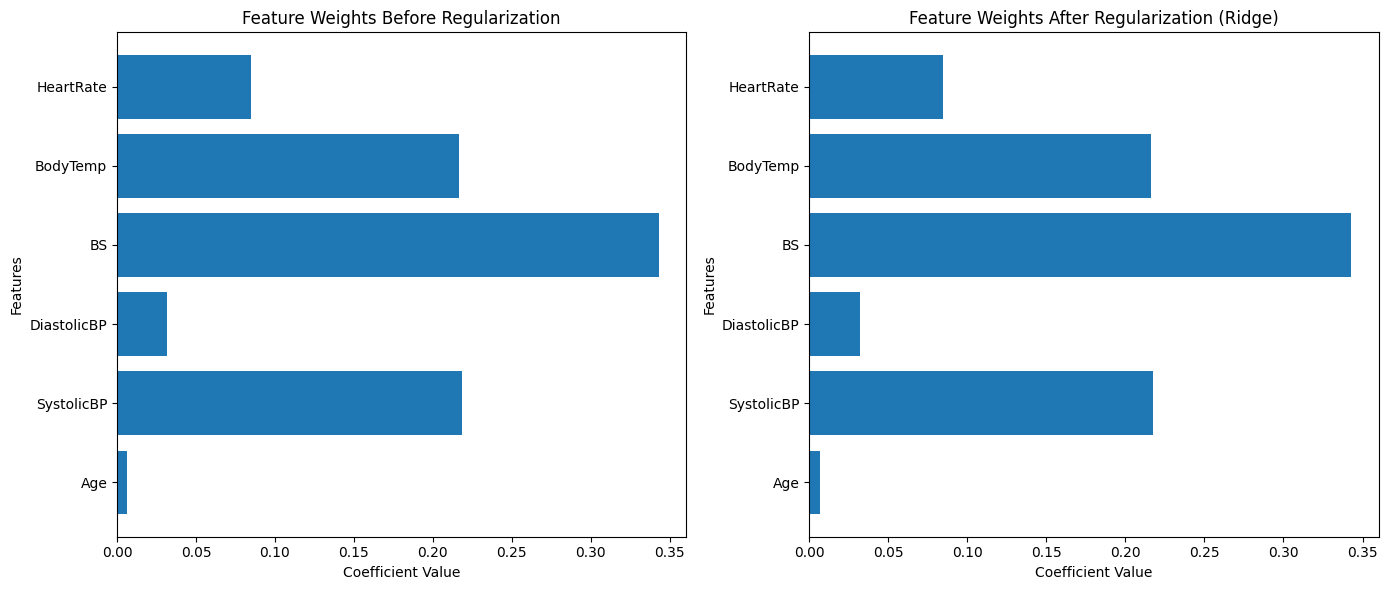

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset (assuming 'Maternal Health Risk Data Set.csv' is available)
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Dropping duplicates
print(f"Total number of duplicates: {df.duplicated().sum()}")
df_cleaned = df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

# Print the number of rows in the cleaned dataset
print(f"Number of rows in the cleaned dataset: {df_cleaned.shape[0]}")

# Mapping RiskLevel to numeric values and handling missing values
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_cleaned['RiskLevel'] = df_cleaned['RiskLevel'].map(risk_mapping)

# Features and target variable
X = df_cleaned.drop(columns='RiskLevel')
y = df_cleaned['RiskLevel']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Linear Regression model (before regularization)
linear_model = LinearRegression()
linear_model.fit(X_scaled, y)
linear_coefficients = pd.Series(linear_model.coef_, index=X.columns)

# Apply Ridge Regression (after regularization) with alpha (controls strength)
ridge = Ridge(alpha=1)  # Adjust alpha for desired regularization strength (higher for stronger)
ridge.fit(X_scaled, y)
ridge_coefficients = pd.Series(ridge.coef_, index=X.columns)

# Plotting the coefficients before and after regularization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before regularization
ax[0].barh(X.columns, linear_coefficients)
ax[0].set_title('Feature Weights Before Regularization')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Features')

# After regularization
ax[1].barh(X.columns, ridge_coefficients)
ax[1].set_title('Feature Weights After Regularization (Ridge)')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Features')

# Print the coefficients to inspect the differences
print("\nRidge Regression Coefficients:")
print(ridge_coefficients)

plt.tight_layout()
plt.show()

Here, Ridge regression doesn't seem to be working.

## Elastic Net regularization

Total number of duplicates: 562
Number of rows in the cleaned dataset: 866
Linear Regression Coefficients:
Age            0.006546
SystolicBP     0.218350
DiastolicBP    0.031356
BS             0.343462
BodyTemp       0.216369
HeartRate      0.084847
dtype: float64


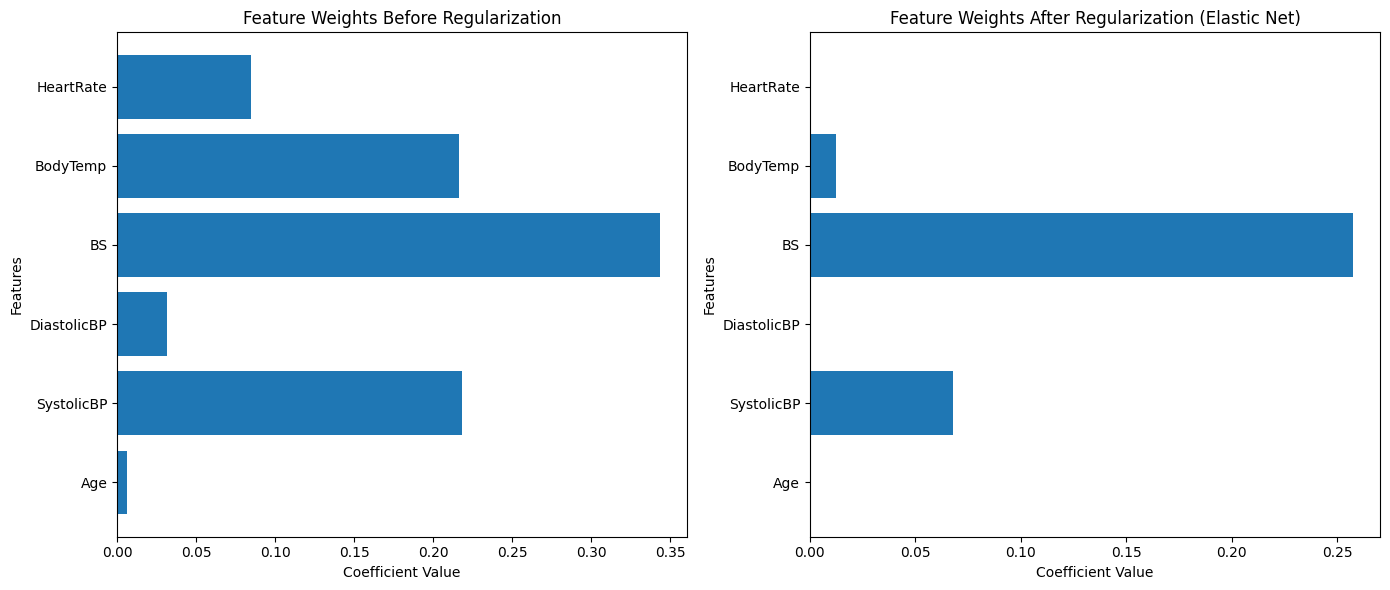

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df = pd.read_csv('Maternal Health Risk Data Set.csv')

# Dropping the duplicates
print(f"Total number of duplicates: {df.duplicated().sum()}")
df_cleaned = df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

# Print the number of rows in the cleaned dataset
print(f"Number of rows in the cleaned dataset: {df_cleaned.shape[0]}")

# Mapping RiskLevel to numeric values
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_cleaned['RiskLevel'] = df_cleaned['RiskLevel'].map(risk_mapping)

# Handling any potential typos in the RiskLevel column
df_cleaned = df_cleaned.dropna(subset=['RiskLevel'])

# Features and target variable
X = df_cleaned.drop(columns='RiskLevel')
y = df_cleaned['RiskLevel']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Linear Regression model (before regularization)
linear_model = LinearRegression()
linear_model.fit(X_scaled, y)
linear_coefficients = pd.Series(linear_model.coef_, index=X.columns)

# Apply Elastic Net Regression (after regularization)
elastic_net = ElasticNet(alpha=0.2, l1_ratio=0.7)  # Alpha is the regularization strength, l1_ratio is the mix of L1 and L2 penalties
elastic_net.fit(X_scaled, y)
elastic_net_coefficients = pd.Series(elastic_net.coef_, index=X.columns)

# Plotting the coefficients before and after regularization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Before regularization
ax[0].barh(X.columns, linear_coefficients)
ax[0].set_title('Feature Weights Before Regularization')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_ylabel('Features')

# After regularization
ax[1].barh(X.columns, elastic_net_coefficients)
ax[1].set_title('Feature Weights After Regularization (Elastic Net)')
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Features')

# Print the coefficients to inspect the differences
print("Linear Regression Coefficients:")
print(linear_coefficients)

plt.tight_layout()
plt.show()

When the l1_ratio and the alpha is increased the regularisation is higher.

## Overall Observation on Regularization Models

The Lasso regularisation regularises the dataset but what we concluded is not the same when we use lasso regularization.